Laboratorio01 -> Práctica 3.

GrupoB06

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paso 1: Estandarización de datos
# Cargar datos
usa_df = pd.read_excel("USA.xlsx")

# Imprimir los primeros 5 registros de los datos originales
print("\nPrimeros 5 registros de los datos originales:")
print(usa_df.head())

# Seleccionar solo las columnas numéricas para la estandarización
columnas_numericas = usa_df.select_dtypes(include=[np.number]).columns.tolist()

# Estandarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(usa_df[columnas_numericas])

# Imprimir los primeros 5 registros de los datos estandarizados
print("\nPrimeros 5 registros de los datos estandarizados:")
print(datos_estandarizados[:5])


Primeros 5 registros de los datos originales:
          Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
0        Phoenix  10.0      70.3     213.0      582.0     6.0    7.05   36.0
1    Little Rock  13.0      61.0      91.0      132.0     8.2   48.52  100.0
2  San Francisco  12.0      56.7     453.0      716.0     8.7   20.66   67.0
3         Denver  17.0      51.9     454.0      515.0     9.0   12.95   86.0
4       Hartford  56.0      49.1     412.0      158.0     9.0   43.37  127.0

Primeros 5 registros de los datos estandarizados:
[[-0.86475834  2.03621325 -0.44936325 -0.04651998 -2.44055543 -2.5560117
  -2.97551354]
 [-0.7353602   0.73351507 -0.66856697 -0.83322354 -0.88150373  1.01065334
  -0.53100899]
 [-0.77849291  0.13119226 -0.01814281  0.18774286 -0.5271738  -1.38547128
  -1.79145665]
 [-0.56282934 -0.54116808 -0.01634606 -0.1636514  -0.31457584 -2.04857684
  -1.06574436]
 [ 1.11934657 -0.93337829 -0.09180964 -0.78776955 -0.31457584  0.56772291
   0.500266

In [11]:
# Paso 2: Análisis de Componentes Principales (PCA)
# Calcular matriz de covarianza
cov_matrix = np.cov(datos_estandarizados, rowvar=False)
print("Matriz de covarianza:\n\n",cov_matrix)

# Calcular autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Imprimir representación de los datos de cada componente principal
print("\nRepresentación de los datos de cada componente principal:")
for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors), start=1):
    print(f"\nComponente Principal {i}:")
    print("Autovalor:", eigenvalue)
    print("Autovector:", eigenvector)

# Calcular el porcentaje de varianza explicada y su acumulado
varianza_explicada_ratio = eigenvalues / np.sum(eigenvalues)
varianza_explicada_acumulada = np.cumsum(varianza_explicada_ratio)

# Crear DataFrame con el porcentaje de varianza y el acumulado por cada componente
df_varianza = pd.DataFrame({'Componente': range(1, len(varianza_explicada_ratio) + 1),
                            'Varianza Explicada': varianza_explicada_ratio,
                            'Varianza Explicada Acumulada': varianza_explicada_acumulada})

# Imprimir DataFrame
print("\n Porcentaje de varianza explicada por cada componente:")
print(df_varianza)

# Calcular la información perdida con 2 componentes
info_perdida_2_componentes = 1 - varianza_explicada_acumulada[1]

# Calcular la información representada con 3 componentes
info_representada_3_componentes = varianza_explicada_acumulada[2]

print("\nInformación perdida con 2 componentes:", info_perdida_2_componentes)
print("Información representada con 3 componentes:", info_representada_3_componentes)

Matriz de covarianza:

 [[ 1.025      -0.4444402   0.66088794  0.50612407  0.09705772  0.0556517
   0.37880272]
 [-0.4444402   1.025      -0.19479322 -0.06424509 -0.35848312  0.39590975
  -0.44099817]
 [ 0.66088794 -0.19479322  1.025       0.97915108  0.24389551 -0.0332273
   0.13512503]
 [ 0.50612407 -0.06424509  0.97915108  1.025       0.21795984 -0.0267717
   0.04313527]
 [ 0.09705772 -0.35848312  0.24389551  0.21795984  1.025      -0.01331924
   0.16820823]
 [ 0.0556517   0.39590975 -0.0332273  -0.0267717  -0.01331924  1.025
   0.50849912]
 [ 0.37880272 -0.44099817  0.13512503  0.04313527  0.16820823  0.50849912
   1.025     ]]

Representación de los datos de cada componente principal:

Componente Principal 1:
Autovalor: 2.7963226762342916
Autovector: [-0.48969882  0.14952928  0.18334573 -0.73039418 -0.40421007  0.08457563
 -0.0143502 ]

Componente Principal 2:
Autovalor: 0.026152798357252132
Autovector: [ 0.31537069 -0.02366411  0.61066107 -0.16246515  0.18522794 -0.08863789
 -0.6

La información representada con 3 componentes indica cuánta varianza total en los datos se puede explicar considerando solo las tres primeras componentes principales. Esto proporciona una medida de la utilidad de incluir una dimensión adicional en la representación de los datos.

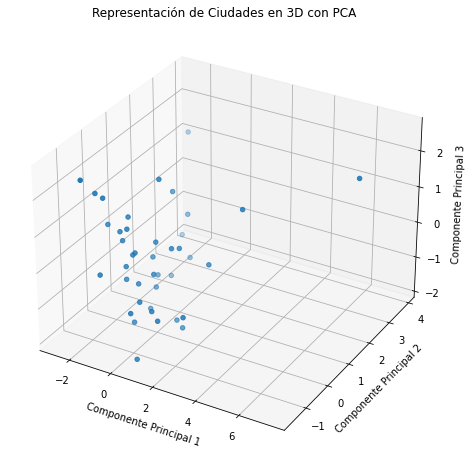

In [3]:
# Paso 3: Representación gráfica en 3 dimensiones
# Obtener componentes principales
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(datos_estandarizados)

# Crear diagrama de dispersión en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(componentes_principales[:, 0], componentes_principales[:, 1], componentes_principales[:, 2])
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Representación de Ciudades en 3D con PCA')
plt.show()



In [4]:
# Paso 4: Repetir los pasos anteriores con scikit-learn
pca_sklearn = PCA(n_components=3)
componentes_principales_sklearn = pca_sklearn.fit_transform(datos_estandarizados)

# Comparar resultados
# (Puedes realizar comparaciones estadísticas adicionales si lo deseas)

# Imprimir los primeros 5 componentes principales obtenidos con ambas implementaciones
print("\nPrimeros 5 componentes principales con nuestra implementación:")
print(componentes_principales[:5])

print("\nPrimeros 5 componentes principales con scikit-learn:")
print(componentes_principales_sklearn[:5])


Primeros 5 componentes principales con nuestra implementación:
[[-2.71597577  3.89143908  1.05835456]
 [-1.71774538 -0.48242002  0.85004335]
 [-0.93896495  2.23724644 -0.18374788]
 [-0.54986148  1.97194298 -1.22859584]
 [ 0.46037184 -1.09733455 -0.58970378]]

Primeros 5 componentes principales con scikit-learn:
[[-2.71597577  3.89143908  1.05835456]
 [-1.71774538 -0.48242002  0.85004335]
 [-0.93896495  2.23724644 -0.18374788]
 [-0.54986148  1.97194298 -1.22859584]
 [ 0.46037184 -1.09733455 -0.58970378]]
